# Plot Distributions - Uniform, Gaussian, Inv Gaussian

In [1]:
import sys
sys.path.append('/workspace/')

import json
import numpy as np
from visualize.visualize_results import VisaulizeResults, VisualizeResults

viz = VisualizeResults()
 


In [ ]:

# Load the file
data1 = np.loadtxt('/workspace/data/truckscenes_test/perturbations_file_test_uniform.txt', delimiter=',')
data1[:, :3] = np.degrees(data1[:, :3])
data1 = np.column_stack((np.mean(np.abs(data1[:, :3]), axis=1), np.mean(np.abs(data1[:, 3:]), axis=1)))

data2 = np.loadtxt('data/truckscenes_test/perturbations_file_test_gaussian.txt', delimiter=',')
data2[:, :3] = np.degrees(data2[:, :3])
data2 = np.column_stack((np.mean(np.abs(data2[:, :3]), axis=1), np.mean(np.abs(data2[:, 3:]), axis=1)))

data3 = np.loadtxt('data/truckscenes_test/perturbations_file_test_inv_gaussian.txt', delimiter=',')
data3[:, :3] = np.degrees(data3[:, :3])
data3 = np.column_stack((np.mean(np.abs(data3[:, :3]), axis=1), np.mean(np.abs(data3[:, 3:]), axis=1)))

with open("/workspace/results/Adaption2_ptv3/results_v1.json", "r") as file1:
    data_dict1 = json.load(file1)
data4 = np.asarray(data_dict1["layer_2"]["error_calib"])

data4 = np.column_stack((np.mean(np.abs(data4[:, :3]), axis=1), np.mean(np.abs(data4[:, 3:]), axis=1)))

with open("/workspace/results/Adaption2_ptv3/results_gaussian.json", "r") as file2:
    data_dict2 = json.load(file2)
data5 = np.asarray(data_dict2["layer_2"]["error_calib"])
data5 = np.column_stack((np.mean(np.abs(data5[:, :3]), axis=1), np.mean(np.abs(data5[:, 3:]), axis=1)))

with open("results/Adaption2_ptv3/results_inv_gaussian.json", "r") as file3:
    data_dict3 = json.load(file3)
data6 = np.asarray(data_dict3["layer_2"]["error_calib"])
data6 = np.column_stack((np.mean(np.abs(data6[:, :3]), axis=1), np.mean(np.abs(data6[:, 3:]), axis=1)))

# with open("/workspace/results/Baseline_Hregnet/results.json", "r") as file4:
#     data_dict4 = json.load(file4)

In [3]:
# viz.plot_theoretical_curves(data=data1, data2=data2, data3=data3,
#                                  data4=data4,data5=data5, data6=data6, 
#                                  data_name="Uniform", data2_name="Gaussian", 
#                                  data3_name="Inverse Gaussian", data4_name="Results Uniform",
#                                  data5_name="Results Gaussian", data6_name="Results Inverse Gaussian")

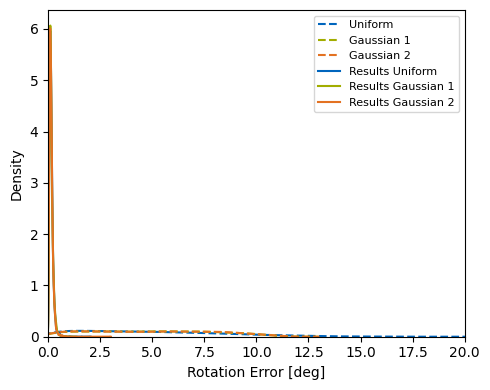

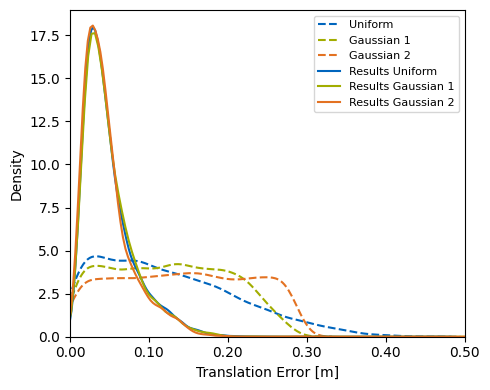

In [4]:
viz.plot_smoothed_curves3(data=data1, data2=data2, data3=data3,
                                 data4=data4, data5=data5, data6=data6, 
                                 data_name="Uniform", data2_name="Gaussian 1", 
                                 data3_name="Gaussian 2", data4_name="Results Uniform",
                                 data5_name="Results Gaussian 1", data6_name="Results Gaussian 2")

In [ ]:
import numpy as np
import json
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import matplotlib.pyplot as plt

# For data1 (Uniform perturbations)
data1 = np.loadtxt('/workspace/data/truckscenes_test/perturbations_file_test_uniform.txt', delimiter=',')
# Compute norm of rotation (first 3 columns) and convert to degrees
rot_norm = np.degrees(np.linalg.norm(data1[:, :3], axis=1))
# Compute norm of translation (last 3 columns)
tran_norm = np.linalg.norm(data1[:, 3:], axis=1)
data1 = np.column_stack((rot_norm, tran_norm))

# For data2 (Gaussian perturbations)
data2 = np.loadtxt('data/truckscenes_test/perturbations_file_test_gaussian.txt', delimiter=',')
rot_norm = np.degrees(np.linalg.norm(data2[:, :3], axis=1))
tran_norm = np.linalg.norm(data2[:, 3:], axis=1)
data2 = np.column_stack((rot_norm, tran_norm))

# For data3 (Inverse Gaussian perturbations)
data3 = np.loadtxt('data/truckscenes_test/perturbations_file_test_inv_gaussian.txt', delimiter=',')
rot_norm = np.degrees(np.linalg.norm(data3[:, :3], axis=1))
tran_norm = np.linalg.norm(data3[:, 3:], axis=1)
data3 = np.column_stack((rot_norm, tran_norm))

# For data4 (from results_v1.json)
with open("/workspace/results/Adaption2_ptv3/results_v1.json", "r") as file1:
    data_dict1 = json.load(file1)
data4 = np.asarray(data_dict1["layer_2"]["error_calib"])
rot_norm = np.degrees(np.linalg.norm(data4[:, :3], axis=1))
tran_norm = np.linalg.norm(data4[:, 3:], axis=1)
data4 = np.column_stack((rot_norm, tran_norm))

# For data5 (from results_gaussian.json)
with open("/workspace/results/Adaption2_ptv3/results_gaussian.json", "r") as file2:
    data_dict2 = json.load(file2)
data5 = np.asarray(data_dict2["layer_2"]["error_calib"])
rot_norm = np.degrees(np.linalg.norm(data5[:, :3], axis=1))
tran_norm = np.linalg.norm(data5[:, 3:], axis=1)
data5 = np.column_stack((rot_norm, tran_norm))

# For data6 (from results_inv_gaussian.json)
with open("results/Adaption2_ptv3/results_inv_gaussian.json", "r") as file3:
    data_dict3 = json.load(file3)
data6 = np.asarray(data_dict3["layer_2"]["error_calib"])
rot_norm = np.degrees(np.linalg.norm(data6[:, :3], axis=1))
tran_norm = np.linalg.norm(data6[:, 3:], axis=1)
data6 = np.column_stack((rot_norm, tran_norm))


In [ ]:
viz.plot_smoothed_curves3(data=data3, data2=data1, data3=data2,
                                 data4=data6,data5=data4, data6=data5, 
                                 data_name="Inverse Gaussian", data2_name="Uniform", 
                                 data3_name="Gaussian", data4_name="Results Inverse Gaussian",
                                 data5_name="Results Uniform", data6_name="Results Gaussian")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_error_histograms(data, 
                          rotation_label="Rotation Error (degrees)", 
                          translation_label="Translation Error (meters)",
                          bins=20):
    """
    Plots histograms of the mean rotation and mean translation errors.
    
    Parameters:
      data (np.ndarray): A (N, 2) array where column 0 contains mean rotation errors 
                         and column 1 contains mean translation errors.
      rotation_label (str): Label for the rotation error x-axis.
      translation_label (str): Label for the translation error x-axis.
      bins (int): Number of bins for the histograms.
    """
    # Create a 1x2 subplot grid.
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot histogram for rotation errors.
    sns.histplot(data[:, 0], bins=bins, ax=axes[0], color="blue", kde=False)
    axes[0].set_title("Histogram of Rotation Errors")
    axes[0].set_xlabel(rotation_label)
    axes[1].set_xlim(0,20)
    axes[0].set_ylabel("Frequency")
    
    # Plot histogram for translation errors.
    sns.histplot(data[:, 1], bins=bins, ax=axes[1], color="green", kde=False)
    axes[1].set_title("Histogram of Translation Errors")
    axes[1].set_xlabel(translation_label)
    axes[1].set_xlim(0,0.5)
    axes[1].set_ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

# Existing UniformTransformSE3

In [ ]:
from transform import UniformTransformSE3
transform = UniformTransformSE3(
            max_deg=20,
            max_tran=0.5,
            distribution="inverse_gaussian",
            mag_randomly=True
        )

perturb_arr = np.zeros([5960, 6])
for i in range(5960):
    perturb_arr[i, :] = transform.generate_transform().cpu().numpy()
np.savetxt("inv_gaussian.txt", perturb_arr, delimiter=',')

In [ ]:
data_inv = np.loadtxt('/workspace/inv_gaussian.txt', delimiter=',')
rot_rad = np.linalg.norm(data_inv[:, :3], axis=1) 
rot_deg = np.degrees(rot_rad)
trans_m = np.linalg.norm(data_inv[:, 3:], axis=1)
data_inv = np.column_stack((rot_deg, trans_m))
plot_error_histograms(data_inv)

In [ ]:

data_inv = np.loadtxt('/workspace/inv_gaussian.txt', delimiter=',')
data_inv[:, :3] = np.degrees(data_inv[:, :3])
data_inv = np.column_stack((np.mean(np.abs(data_inv[:, :3]), axis=1), np.mean(np.abs(data_inv[:, 3:]), axis=1)))
plot_error_histograms(data_inv)


# with custom inverse gaussian distribution 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgauss, skew
import torch


def generate_transform_inverse_gaussian(max_deg, max_tran):
    """
    Generates a twist vector (6D: [w, t]) where:
      - w is the rotation error vector (in radians)
      - t is the translation error vector
    The magnitude of w and t is sampled from an inverse Gaussian distribution
    (which is skewed) and then clipped to the maximum allowed values.

    max_deg: Maximum rotation error in degrees (e.g., 20)
    max_tran: Maximum translation error (e.g., 0.5)
    """
    # Convert maximum rotation error to radians.
    amp = max_deg * np.pi / 180.0   # maximum rotation error in radians
    tran = max_tran                 # maximum translation error remains as given

    # Choose inverse Gaussian parameters to yield high skewness.
    # Theoretical skewness = 3 * sqrt(mu / lambda)
    # For example, with mu = 1.0 and lambda = 0.0225, the skewness is ~20.
    mu_w = 1.0    
    mu_t = 0.01   
    lambda_w = 0.0225    
    lambda_t = 0.000225  
    
    # Sample scalar magnitudes from the inverse Gaussian distribution.
    m_w = invgauss.rvs(mu=mu_w, scale=lambda_w, size=1)[0]
    m_t = invgauss.rvs(mu=mu_t, scale=lambda_t, size=1)[0]
    
    # Clip the sampled magnitudes so they do not exceed the maximum allowed errors.
    m_w = min(m_w, amp)
    m_t = min(m_t, tran)
    
    # Generate random unit vectors for rotation and translation.
    dir_w = torch.randn(1, 3)
    dir_w = dir_w / dir_w.norm(p=2, dim=1, keepdim=True)
    dir_t = torch.randn(1, 3)
    dir_t = dir_t / dir_t.norm(p=2, dim=1, keepdim=True)
    
    # Multiply the unit directions by the sampled (and clipped) magnitudes.
    w = dir_w * m_w   # Rotation error vector (in radians)
    t = dir_t * m_t   # Translation error vector

    # Combine into a single 6D twist vector.
    twist = torch.cat([w, t], dim=1)
    return twist

# # Example usage of the revised twist vector generation:
# twist_sample = generate_transform_inverse_gaussian(20, 0.5)
# print("Sample twist vector from revised inverse Gaussian branch:", twist_sample)

In [ ]:
# from transform import UniformTransformSE3
# transform = UniformTransformSE3(
#             max_deg=20,
#             max_tran=0.5,
#             distribution="inverse_gaussian",
#             mag_randomly=True
#         )

perturb_arr = np.zeros([5960, 6])
for i in range(5960):
    perturb_arr[i, :] = generate_transform_inverse_gaussian(20, 0.5)
np.savetxt("inv_gaussian.txt", perturb_arr, delimiter=',')




In [ ]:

data_inv = np.loadtxt('/workspace/inv_gaussian.txt', delimiter=',')
data_inv[:, :3] = np.degrees(data_inv[:, :3])
data_inv = np.column_stack((np.mean(np.abs(data_inv[:, :3]), axis=1), np.mean(np.abs(data_inv[:, 3:]), axis=1)))
plot_error_histograms(data_inv)


# with custom inverse gaussian distribution 2

In [ ]:
# ------------------------------
# Part 2: Twist Vector Generation Using Reflected Inverse Gaussian
# ------------------------------
def generate_transform_inverse_gaussian_reflected(max_deg, max_tran):
    """
    Generates a twist vector (6D: [w, t]) where:
      - w is the rotation error vector (in radians)
      - t is the translation error vector
    Instead of using the raw inverse Gaussian sample (which is right-skewed with a mode near zero),
    this function reflects the sample so that the peak of the error magnitude is near the maximum allowed value.
    
    max_deg: Maximum rotation error in degrees (e.g., 20)
    max_tran: Maximum translation error (e.g., 0.5)
    """
    # Convert maximum rotation error to radians.
    amp = max_deg * np.pi / 180.0   # maximum rotation error in radians
    tran = max_tran                 # maximum translation error
    
    # Choose inverse Gaussian parameters to yield high skewness.
    # The theoretical skewness is 3 * sqrt(mu/lambda).
    # For a high skewness (e.g. ~20), one example is:
    mu_w = 1.0    
    mu_t = 0.01   
    lambda_w = 0.0225    
    lambda_t = 0.0020225  
    
    # Sample scalar magnitudes from the inverse Gaussian distribution.
    # These samples are positive and (in the usual parameterization) have their mode near zero.
    m_w_raw = invgauss.rvs(mu=mu_w, scale=lambda_w, size=1)[0]
    m_t_raw = invgauss.rvs(mu=mu_t, scale=lambda_t, size=1)[0]
    
    # Reflect the sample so that smaller raw values become larger errors.
    # For instance, define the final magnitude as:
    #   m_final = max_allowed - min(m_raw, max_allowed)
    # This means that if the raw sample is very small, m_final is nearly max_allowed.
    m_w = amp - min(m_w_raw, amp)
    m_t = tran - min(m_t_raw, tran)
    
    # (Optional: You can add a scaling factor if desired. Here we simply reflect.)
    
    # Generate random unit vectors for rotation and translation.
    dir_w = torch.randn(1, 3)
    dir_w = dir_w / dir_w.norm(p=2, dim=1, keepdim=True)
    dir_t = torch.randn(1, 3)
    dir_t = dir_t / dir_t.norm(p=2, dim=1, keepdim=True)
    
    # Multiply the unit directions by the reflected magnitudes.
    w = dir_w * m_w   # Rotation error vector (in radians)
    t = dir_t * m_t   # Translation error vector
    
    # Combine into one 6D twist vector.
    twist = torch.cat([w, t], dim=1)
    return twist

# ------------------------------
# Example: Generate many samples and plot histograms for mean errors
# ------------------------------
num_samples = 5960
perturb_arr = np.zeros([num_samples, 6])
for i in range(num_samples):
    twist = generate_transform_inverse_gaussian_reflected(20, 0.5)
    perturb_arr[i, :] = twist.cpu().numpy()

# Save the generated array for inspection.
np.savetxt("inv_gaussian.txt", perturb_arr, delimiter=',')

# Now, for visualization, compute the mean absolute rotation (first 3 components)
# and mean absolute translation (last 3 components) per sample.
data_inv = np.loadtxt("inv_gaussian.txt", delimiter=',')
# Convert rotation errors from radians to degrees.
data_inv[:, :3] = np.degrees(data_inv[:, :3])
# Compute the mean absolute error for rotation and translation.
data_inv_mean = np.column_stack((np.mean(np.abs(data_inv[:, :3]), axis=1),
                                 np.mean(np.abs(data_inv[:, 3:]), axis=1)))


plot_error_histograms(data_inv_mean)

# with custom inverse gaussian distribution 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgauss, skew
import torch
import seaborn as sns

# ------------------------------
# Function: Generate Twist Vector with Smooth Translation Mapping
# ------------------------------
def generate_transform_inverse_gaussian_reflected_smooth(max_deg, max_tran, alpha_t=5.8):
    """
    Generates a twist vector (6D: [w, t]) where:
      - w is the rotation error vector (in radians)
      - t is the translation error vector
    For rotation, a reflected inverse Gaussian is used:
         m_w = amp - min(m_w_raw, amp)
    For translation, a smooth exponential mapping is used:
         m_t = tran * exp(-alpha_t * m_t_raw)
    This approach preserves a skewed rotation distribution (with a peak near the upper bound)
    and produces a smoother translation error distribution without an abrupt cutoff.
    
    Parameters:
      max_deg: Maximum rotation error in degrees (e.g., 20)
      max_tran: Maximum translation error (e.g., 0.5)
      alpha_t: Exponential decay factor for translation error (controls smoothness)
    
    Returns:
      twist: a torch.Tensor of shape [1, 6] containing the twist vector.
    """
    # Convert maximum rotation error to radians.
    amp = max_deg * np.pi / 180.0   # maximum rotation error in radians
    tran = max_tran                 # maximum translation error
    
    # Inverse Gaussian parameters chosen for high skewness.
    # Theoretical skewness = 3 * sqrt(mu / lambda)
    mu_w = 1.0    
    mu_t = 0.01   
    lambda_w = 0.0225    
    lambda_t = 0.000225  
    
    # Sample scalar magnitudes from the inverse Gaussian.
    m_w_raw = invgauss.rvs(mu=mu_w, scale=lambda_w, size=1)[0]
    m_t_raw = invgauss.rvs(mu=mu_t, scale=lambda_t, size=1)[0]
    
    # For rotation: reflect the sample so that small m_w_raw yield high errors.
    m_w = amp - min(m_w_raw, amp)
    
    # For translation: use an exponential mapping for a smooth decay.
    m_t = tran * np.exp(-alpha_t * m_t_raw)
    
    # Generate random unit vectors.
    dir_w = torch.randn(1, 3)
    dir_w = dir_w / dir_w.norm(p=2, dim=1, keepdim=True)
    dir_t = torch.randn(1, 3)
    dir_t = dir_t / dir_t.norm(p=2, dim=1, keepdim=True)
    
    # Compute the final error vectors.
    w = dir_w * m_w   # Rotation error vector (radians)
    t = dir_t * m_t   # Translation error vector
    
    # Concatenate to form a 6D twist vector.
    twist = torch.cat([w, t], dim=1)
    return twist



In [ ]:

num_samples = 5960
perturb_arr = np.zeros([num_samples, 6])
for i in range(num_samples):
    twist = generate_transform_inverse_gaussian_reflected_smooth(20, 0.5, alpha_t=5.8)
    perturb_arr[i, :] = twist.cpu().numpy()

# Save the generated data.
np.savetxt("inv_gaussian_smooth.txt", perturb_arr, delimiter=',')

# Process data for visualization:
# Convert the first 3 columns (rotation errors) from radians to degrees.
data_inv = np.loadtxt("inv_gaussian_smooth.txt", delimiter=',')
data_inv[:, :3] = np.degrees(data_inv[:, :3])
# Compute mean absolute error for rotation and translation per sample.
data_inv_mean = np.column_stack((np.mean(np.abs(data_inv[:, :3]), axis=1),
                                  np.mean(np.abs(data_inv[:, 3:]), axis=1)))

plot_error_histograms(data_inv_mean)
